<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_21%EC%9D%BC_(%ED%99%94)_Day_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터 다운 받기
from torchvision.datasets import MNIST

dataset = MNIST(root='data', train=True, download=True)

#슬랙 말고, pycharm으로 할 때!
for img, label in dataset:
    print(type(img))
    print(type(label))
    break

<class 'PIL.Image.Image'>
<class 'int'>


#이미지 확인해보기

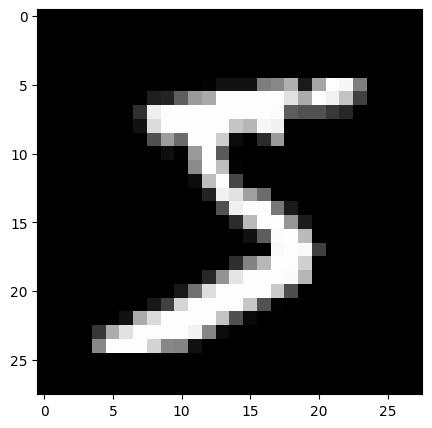

In [ ]:
#코랩으로 할 때는 아래와 같은 방법으로 시행
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

for img, label in dataset:
    ax.imshow(img, cmap='gray')
    # image 스펙 살펴보기
    # print(img.shape, img.dtype)
    break

# Image 10개 뽑아보기

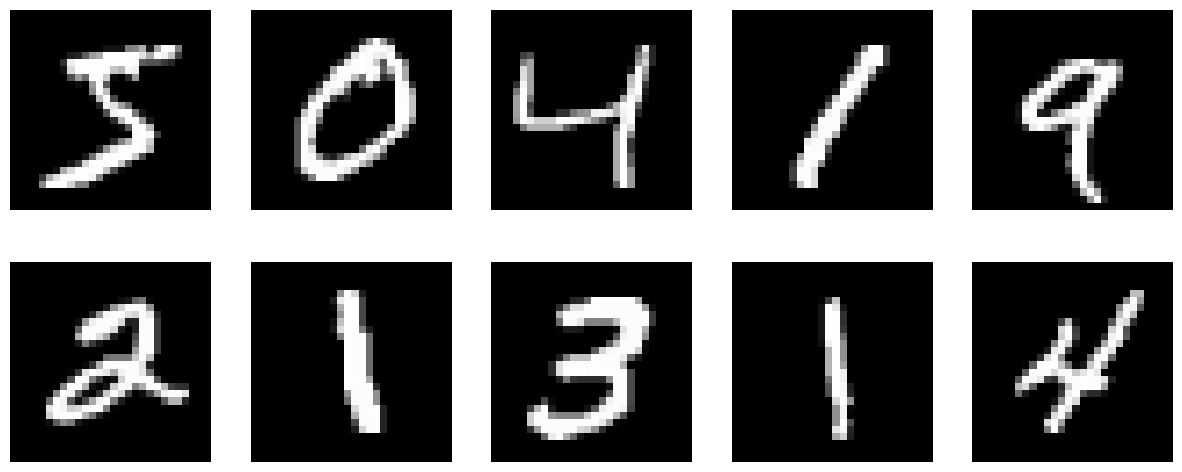

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    img, label = dataset[i]
    axs[i // 5, i % 5].imshow(img, cmap='gray')
    axs[i // 5, i % 5].axis('off')

plt.show()

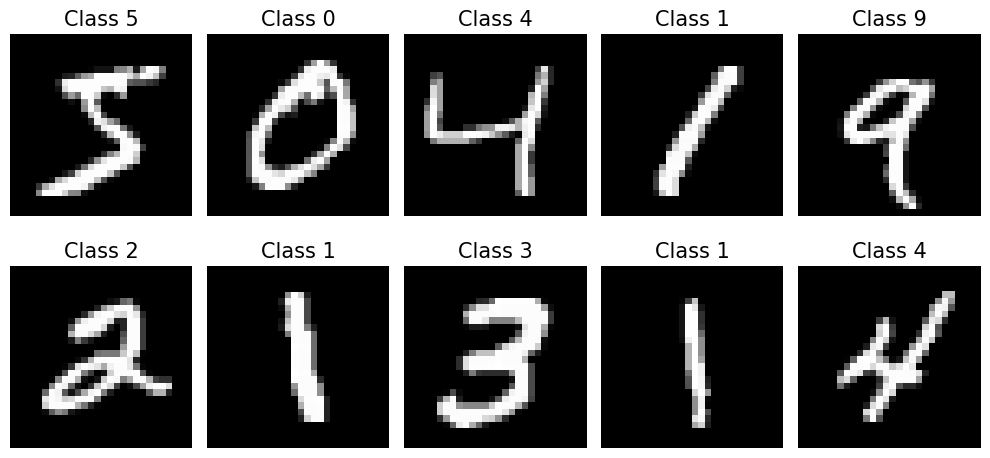

In [ ]:
#강사님 답
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

dataset = MNIST(root='data', train=True, download=True)

fig, axes = plt.subplots(2,5,figsize=(10,5))
for ax_idx, ax in enumerate(axes.flat):
    img, label = dataset[ax_idx]

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class {label}", fontsize=15)

    ax.axis('off')
    if ax_idx >= 9 : break

fig.tight_layout()
plt.show()

#Dataset Preparation

-ToTensor는 데이터를 PIL.Image 객체가 아니라 PyTorch의 Tensor 객체로 자동으로 변환해줌.

-[참고]unit 8에서 normalization해줘서 float32로 자동으로 변환해주는 기능 포함

-len(dataset)은 데이터셋에 들어있는 전체 샘플의 개수

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

BATCH_SIZE = 32

dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
n_samples = len(dataset)
print(n_samples)

60000


#Model Implementation

In [ ]:
#in_feature 값은 28*28인 784로 넣어주면 됨.
#마지막 layer의 out_feature 값은 10으로 뽑아주면 됨.(숫자 0-9까지 class가 10개이기 때문)

import torch.nn as nn
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super(MNIST_Classifier, self).__init__()

        self.fc1 = nn.Linear(in_features=784, out_features=512)
        self.fc1_act = nn.ReLU()

        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc2_act = nn.ReLU()

        self.fc3 = nn.Linear(in_features=128, out_features=52)
        self.fc3_act = nn.ReLU()

        self.fc4 = nn.Linear(in_features=52, out_features=10)

    def forward(self,x):
        x = self.fc1_act(self.fc1(x))
        x = self.fc2_act(self.fc2(x))
        x = self.fc3_act(self.fc3(x))
        x = self.fc4(x)
        return x

#Training Setting

In [ ]:
import torch
from torch.optim import SGD

LR = 0.003
EPOCHS = 10

if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEVICE = 'mps'
else: DEVICE = 'cpu'

model = MNIST_Classifier().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

# Training

In [ ]:
#tqdm을 사용하면 epoch에 대한 학습 경과를 보여줌
from tqdm import tqdm
losses, accs = [],[]
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0.,0
    for X_, y_ in tqdm(dataloader):
        X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
        X_ = X_.reshape(BATCH_SIZE,-1)

        pred = model(X_)
        loss = loss_function(pred, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()*len(X_)
        n_corrects += (torch.max(pred, axis=1)[1]==y_).sum().item()

    epoch_loss /= n_samples
    losses.append(epoch_loss)

    epoch_acc = n_corrects/n_samples
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")

100%|██████████| 1875/1875 [00:10<00:00, 180.49it/s]


Epoch: 1
Loss: 2.2698 - Acc: 0.2066


100%|██████████| 1875/1875 [00:10<00:00, 182.31it/s]


Epoch: 2
Loss: 1.8457 - Acc: 0.5194


100%|██████████| 1875/1875 [00:10<00:00, 179.41it/s]


Epoch: 3
Loss: 0.8550 - Acc: 0.7558


100%|██████████| 1875/1875 [00:10<00:00, 179.54it/s]


Epoch: 4
Loss: 0.5421 - Acc: 0.8445


100%|██████████| 1875/1875 [00:10<00:00, 179.66it/s]


Epoch: 5
Loss: 0.4270 - Acc: 0.8781


100%|██████████| 1875/1875 [00:09<00:00, 190.57it/s]


Epoch: 6
Loss: 0.3734 - Acc: 0.8944


100%|██████████| 1875/1875 [00:10<00:00, 184.13it/s]


Epoch: 7
Loss: 0.3419 - Acc: 0.9037


100%|██████████| 1875/1875 [00:10<00:00, 176.49it/s]


Epoch: 8
Loss: 0.3188 - Acc: 0.9100


100%|██████████| 1875/1875 [00:10<00:00, 179.07it/s]


Epoch: 9
Loss: 0.2991 - Acc: 0.9151


100%|██████████| 1875/1875 [00:11<00:00, 163.49it/s]

Epoch: 10
Loss: 0.2811 - Acc: 0.9206


#Visualization

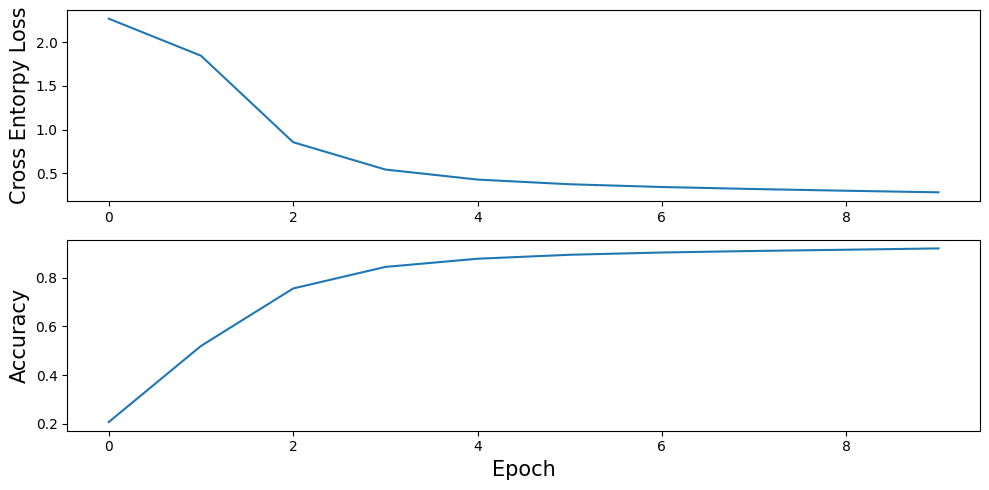

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(losses)
axes[1].plot(accs)
axes[1].set_xlabel("Epoch", fontsize=15)
axes[0].set_ylabel("Cross Entorpy Loss", fontsize=15)
axes[1].set_ylabel("Accuracy", fontsize=15)
axes[0].tick_params(labelsize=10)
axes[1].tick_params(labelsize=10)
fig.tight_layout()
plt.show()

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch
from torch.optim import SGD

#모델 만들기
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super(MNIST_Classifier, self).__init__()

        self.fc1 = nn.Linear(in_features=784, out_features=512)
        self.fc1_act = nn.ReLU()

        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc2_act = nn.ReLU()

        self.fc3 = nn.Linear(in_features=128, out_features=52)
        self.fc3_act = nn.ReLU()

        self.fc4 = nn.Linear(in_features=52, out_features=10)

    def forward(self,x):
        x = self.fc1_act(self.fc1(x))
        x = self.fc2_act(self.fc2(x))
        x = self.fc3_act(self.fc3(x))
        x = self.fc4(x)
        return x

#함수 생성하기
def get_device():
    if torch.cuda.is_available(): DEVICE = 'cuda'
    elif torch.backends.mps.is_available(): DEVICE = 'mps'
    else: DEVICE = 'cpu'

def get_dataset():
    dataset = MNIST(root='data', train=True, download=True, transform=ToTensor())
    dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
    n_samples = len(dataset)
    return dataloader

def vis_losses_accs(losses, accs):
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))
    axes[0].plot(losses)
    axes[1].plot(accs)
    axes[1].set_xlabel("Epoch", fontsize=15)
    axes[0].set_ylabel("BCE Loss", fontsize=15)
    axes[1].set_ylabel("Accuracy", fontsize=15)
    axes[0].tick_params(labelsize=10)
    axes[1].tick_params(labelsize=10)
    fig.tight_layout()
    plt.show()

100%|██████████| 1875/1875 [00:12<00:00, 147.32it/s]


Epoch: 1
Loss: 2.2868 - Acc: 0.1284


100%|██████████| 1875/1875 [00:12<00:00, 150.51it/s]


Epoch: 2
Loss: 2.0834 - Acc: 0.4413


100%|██████████| 1875/1875 [00:12<00:00, 152.94it/s]


Epoch: 3
Loss: 1.0245 - Acc: 0.7258


100%|██████████| 1875/1875 [00:12<00:00, 153.14it/s]


Epoch: 4
Loss: 0.5949 - Acc: 0.8223


100%|██████████| 1875/1875 [00:11<00:00, 158.71it/s]


Epoch: 5
Loss: 0.4736 - Acc: 0.8620


100%|██████████| 1875/1875 [00:11<00:00, 166.16it/s]


Epoch: 6
Loss: 0.4062 - Acc: 0.8835


100%|██████████| 1875/1875 [00:12<00:00, 155.65it/s]


Epoch: 7
Loss: 0.3616 - Acc: 0.8974


100%|██████████| 1875/1875 [00:12<00:00, 149.05it/s]


Epoch: 8
Loss: 0.3307 - Acc: 0.9062


100%|██████████| 1875/1875 [00:12<00:00, 155.64it/s]


Epoch: 9
Loss: 0.3075 - Acc: 0.9134


100%|██████████| 1875/1875 [00:12<00:00, 153.70it/s]


Epoch: 10
Loss: 0.2879 - Acc: 0.9182


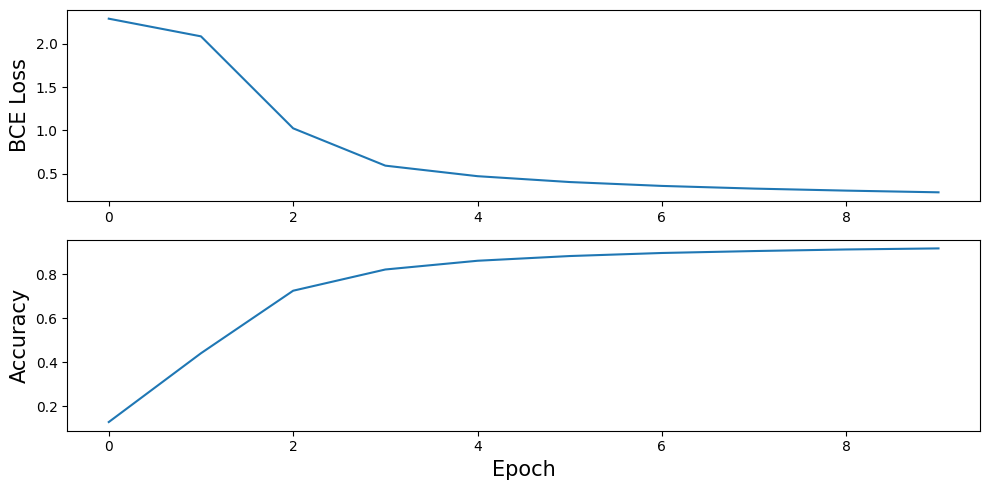

In [ ]:
import torch.nn as nn
from torch.optim import SGD
from tqdm import tqdm

N_SAMPLES = len(dataset)
BATCH_SIZE = 32
LR = 0.003
EPOCHS = 10
DEVICE = get_device()

dataloader = get_dataset()

model = MNIST_Classifier().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [],[]
for epoch in range(EPOCHS):
    epoch_loss, n_corrects = 0.,0
    for X_, y_ in tqdm(dataloader):
        X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
        X_ = X_.reshape(BATCH_SIZE,-1)

        pred = model(X_)
        loss = loss_function(pred, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()*len(X_)
        n_corrects += (torch.max(pred, axis=1)[1]==y_).sum().item()

    epoch_loss /= n_samples
    losses.append(epoch_loss)

    epoch_acc = n_corrects/n_samples
    accs.append(epoch_acc)

    print(f"Epoch: {epoch+1}")
    print(f"Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")

vis_losses_accs(losses, accs)